# Classification of iris flowers using a linear classifier

Classification is an important technique in data analysis. For example, one would like to develop a model to classify hand-written characters into one of the alphabets in a language. There are several methods for such problems, each can be tailored to the dataset at hand and and their degree of robustness can be improved to various extents.

To begin with, we will apply a classification algorithm on an entire dataset, i.e., without paritioning the data into training and test sets. 

## Two-variables classification using sepal length and sepal width

### Let's visualize the iris dataset as a map in these two variables.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

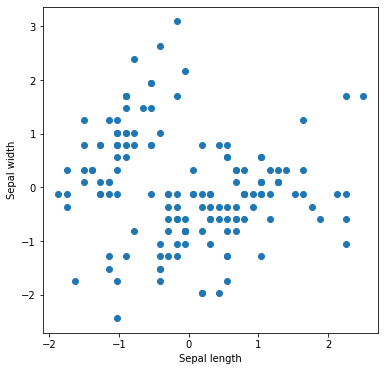

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(6,6))
axes.scatter(x_iris[:,0],x_iris[:,1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

As done in DS_03, we can color code each flower.

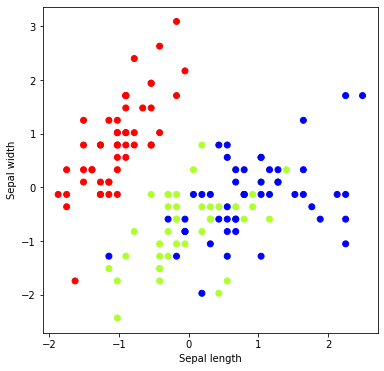

In [3]:
import matplotlib.pyplot as plt

# Get color for each entry of data 
N_data=iris.data.shape[0]

colors=list()
palette={0:'red',1:'greenyellow',2:'blue'} 

for i_data in range(N_data):
    i_color=int(iris.target[i_data])
    colors.append(palette[i_color])

# Plot again    
fig, axes = plt.subplots(figsize=(6,6))
axes.scatter(x_iris[:,0],x_iris[:,1],c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

You can further improve this plot, by adding the legend to each color. To do that you have to make the scatterplot one species after another.

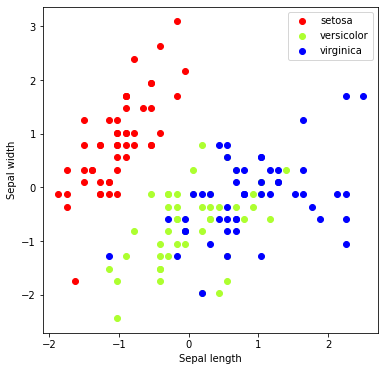

In [4]:
import matplotlib.pyplot as plt
colors_list=['red','greenyellow','blue']
fig, axes = plt.subplots(figsize=(6,6))
for i in range(len(colors_list)):
    xs=x_iris[:,0][y_iris==i]
    ys=x_iris[:,1][y_iris==i]
    axes.scatter(xs,ys,c=colors_list[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Linear classification using stochastic gradient descent

In this method, classification is done by separating each species from the rest by _hyperplanes_ in the _feature space_. In the 2D space, these hyperplanes are straight lines. 

In [5]:
from sklearn.linear_model import SGDClassifier

# The classification model is stochastic gradient classifier
clf_model=SGDClassifier()

# We will use sepal length/width as features
features=x_iris[:,0:2]

# Label needed for classification are 0,1,2
label=y_iris

# Fit
clf_model.fit(features, label)

# Coefficients and intercepts to define the hyperplane
coeffs=clf_model.coef_
intercept=clf_model.intercept_

### Visualize the hyerplanes

Since we have three labels, we will have three hyperplanes each defined in terms of coefficients and intercepts. 

In [6]:
print(coeffs)

[[-25.0028939   13.42430655]
 [  5.17462247  -4.65671139]
 [  6.14599897  -0.29664976]]


In [7]:
print(intercept)

[-14.39709796  -3.12470237  -2.17808618]


The first hyperplane is defined by the equation $i_1 + c_{11} x_1 + c_{12} x_2=0 \Rightarrow x_2 = -i_1/c_{12} - c_{11}/c_{12} x_1=(-i_1-c_{11}x_1)/c_{12}$, which is an equation of a straight line. 

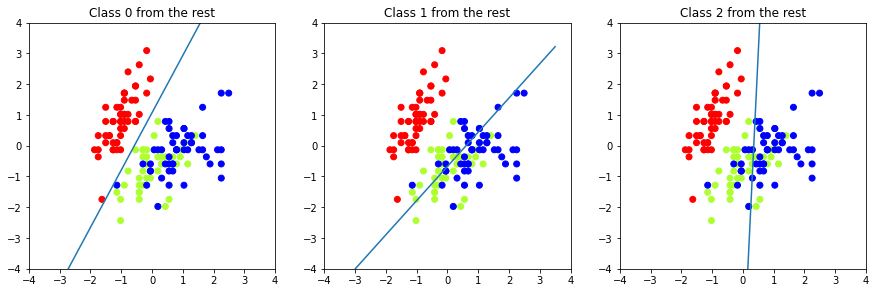

In [8]:
x1_min, x1_max = -4, 4 # x-range
x2_min, x2_max = -4, 4 # y-range

xs = np.arange(x1_min, x1_max, 0.5)

fig, axes = plt.subplots(1,3,figsize=(15,15))

for i in [0, 1, 2]:
    axes[i].set_aspect(1.0)
    axes[i].set_title('Class '+str(i)+' from the rest')
    axes[i].set_xlim(x1_min, x1_max)
    axes[i].set_ylim(x2_min, x2_max)
    axes[i].scatter(features[:,0], features[:,1], c=colors)
    ys=(-intercept[i]-xs*coeffs[i,0])/coeffs[i,1]   # straight line
    axes[i].plot(xs,ys)

From the first plot it appears that we can easily separate (i.e. classify) the class-0 from the other classes with a  straight line in the plane splanned by sepal length and sepal width. From the second and third plot, we see hat it is hard to classify between class-1 and class-2.

In [9]:
from sklearn import metrics

# predict y using the features
y_pred=clf_model.predict(features)

In [10]:
print(metrics.classification_report(y_pred,y_iris))

# Try
# print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))
# Try
# print(metrics.classification_report(y_pred,y_iris),labels=np.unique(y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.64      0.65      0.65        49
           2       0.64      0.65      0.65        49

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



The column `precision` gives the scores for classification. We see that the score is very high for class-0 compared to the other two classes as in agreement with the plots discussed above. You can also get an overall score for all classes.

In [11]:
print(metrics.accuracy_score(y_pred,label))

0.76


If you are interested in seeing whether during prediction, you have assigned a class which is not present at all in the original list of labels, you can try the following.

In [12]:
set(y_iris) - set(y_pred)

set()

## Using all four features

In [13]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

clf_model=SGDClassifier()
clf_model.fit(x_iris, y_iris)

y_pred=clf_model.predict(x_iris)

print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.92      0.95        53
   virginica       0.92      0.98      0.95        47

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [14]:
print('Overall score:',metrics.accuracy_score(y_pred,label))

Overall score: 0.9666666666666667


It is not possible to visualize the hyperplanes in the 4D feature space to get a visual picture of how different classes are separated. 

## Training and Testing

Remember, the data analytics tehcniques that we have been discussing have become so popular because, these models once trained over a selected set of data are applicable to perform the same task in a new data. Further, these models also improve their performance as more and more data are used for re-training them. Hence, we say that these models learn and also denote them as machine learning methods. 

Here, the term _machine_ stands for the algorithm and not the computer as it is sometimes mis-interpreted.  To demonstrate this approach, let's divide the iris dataset into training and test sets using an 80/20 split. 

In [15]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=0)

clf_model=SGDClassifier()
clf_model.fit(x_train, y_train)

y_pred=clf_model.predict(x_test)

print(metrics.classification_report(y_pred,y_test,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.87      0.93        15
   virginica       0.67      1.00      0.80         4

    accuracy                           0.93        30
   macro avg       0.89      0.96      0.91        30
weighted avg       0.96      0.93      0.94        30



In [16]:
print(metrics.accuracy_score(y_pred,y_test))

0.9333333333333333


Overall, what we have done so far is to develop a classification model using 80% of the iris dataset and applied the same model (i.e. coefficients and intercepts) to predict the labels of the remaining 20% of the dataset. When we compare `y_pred` against the actual labels of the test set collected in `y_test`, we have gotten a very good score of > 0.95. NOTE: due to random shuffling, the score may vary if you run the code again.

## Error metrics

The scores `precision` and `recall` are scores based on the fraction of labels we got correct. 

If an actual label is 0 and the model predicts it correctly as 0, then we say that the prediction is a `True positive` for class 0 (or label 0). On the other hand, if the actual label is 0 and the model predicts it wrongly, we say that the prediction is a `False negative` for class 0.

If the prediction is 0 but the actual class is not 0, then the prediction is a `False positive` for class 0. Finally, if the prediction is not 0, and the actual class is also not 0, then the prediction is a `True negative` for class 0. Note that in the last case, the actual and the predicted classes need to be the same.

The following table should make these terms easy to understand. 

**Actual label**| $~$|**Classified as** | $~$
:-----:|:-----:|:-----:|:-----:
        |$~$ | setosa           |Not setosa
setosa|$~$|True positive ($TP$)  |False negative ($FN$) 
Not setosa|$~$|False positive ($FP$) |True negative ($TN$)

### Precision

`Precision` is the fraction of entries predicted to be in a class, that are correct predictions.
$$
{\rm Precision\,of\,setosa}=\frac{\rm Correct\,predictions\,of\,setosa}{\rm All\,predicted\,to\,be\,setosa}
$$
In other words, for any class,
$$
{\rm Precision}=\frac{TP}{TP+FP}
$$

### Recall

`Recall` is the fraction of entries that are actually in class predicted correctly.
$$
{\rm Recall\,of\,setosa}=\frac{\rm Correct\,predictions\,of\,setosa}{\rm All\,actually\,in\,setosa}
$$
In other words, for any class,
$$
{\rm Recall}=\frac{TP}{TP+FN}
$$

We can code these functions and see if they agree with the scores printed above.

In [17]:
def PandN(y_pred,y_test):
    
    N_vals=len(y_pred)
    
    # get unique set of labels
    y_test_uniq=list(set(y_test))
    
    N_label=len(y_test_uniq)
    
    TP=np.zeros(N_label)
    TN=np.zeros(N_label)
    FP=np.zeros(N_label)
    FN=np.zeros(N_label)
    
    for i_label in range(0,N_label):
        for i_vals in range(0,N_vals):
            
            if ((y_test[i_vals] == y_test_uniq[i_label]) & (y_pred[i_vals] == y_test_uniq[i_label])):
                TP[i_label]=TP[i_label]+1
            if ((y_test[i_vals] == y_test_uniq[i_label]) & (y_pred[i_vals] != y_test_uniq[i_label])):
                FP[i_label]=FP[i_label]+1
            if ((y_test[i_vals] != y_test_uniq[i_label]) & (y_pred[i_vals] == y_test_uniq[i_label])):
                FN[i_label]=FN[i_label]+1
            if ((y_test[i_vals] != y_test_uniq[i_label]) & (y_pred[i_vals] != y_test_uniq[i_label])):
                TN[i_label]=TN[i_label]+1
                
    return TP, TN, FP, FN
    

In [18]:
TP, TN, FP, FN = PandN(y_pred,y_test)
print(TP, TN, FP, FN)

[11. 13.  4.] [19. 15. 24.] [0. 0. 2.] [0. 2. 0.]


Small values for $FP$ and $FN$ means that the prediction is good.

In [19]:
y_test_uniq=list(set(y_test))
    
N_label=len(y_test_uniq)

for i_label in range(0, N_label):
    Precision=TP[i_label]/(TP[i_label] + FP[i_label])
    Recall=TP[i_label]/(TP[i_label] + FN[i_label])
    print('Precision for class ',i_label,' is', Precision, ', Recall for class ',i_label,' is', Recall)

Precision for class  0  is 1.0 , Recall for class  0  is 1.0
Precision for class  1  is 1.0 , Recall for class  1  is 0.8666666666666667
Precision for class  2  is 0.6666666666666666 , Recall for class  2  is 1.0


Our code agrees with the values given by `sklearn`.

### Another test for `Precision` and `Recall`

We'll make the model worse by training on few entries and testing on more data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.8, random_state=0)

clf_model=SGDClassifier()
clf_model.fit(x_train, y_train)

y_pred=clf_model.predict(x_test)

print(metrics.classification_report(y_pred,y_test,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.97      0.81      0.89        48
  versicolor       0.77      0.64      0.70        47
   virginica       0.61      1.00      0.76        25

    accuracy                           0.78       120
   macro avg       0.78      0.82      0.78       120
weighted avg       0.82      0.78      0.79       120



In [21]:
print(metrics.accuracy_score(y_pred,y_test))

0.7833333333333333


In [22]:
TP, TN, FP, FN = PandN(y_pred,y_test)
print(TP, TN, FP, FN)

[39. 30. 25.] [71. 64. 79.] [ 1.  9. 16.] [ 9. 17.  0.]


In [23]:
y_test_uniq=list(set(y_test))
    
N_label=len(y_test_uniq)

for i_label in range(0, N_label):
    Precision=TP[i_label]/(TP[i_label] + FP[i_label])
    Recall=TP[i_label]/(TP[i_label] + FN[i_label])
    print('Precision for class ',i_label,' is', Precision, ', Recall for class ',i_label,' is', Recall)

Precision for class  0  is 0.975 , Recall for class  0  is 0.8125
Precision for class  1  is 0.7692307692307693 , Recall for class  1  is 0.6382978723404256
Precision for class  2  is 0.6097560975609756 , Recall for class  2  is 1.0


Now we are even more confident that our formulas for `Precision` and `Recall` are indeed correct.

### F1-score

`F1-score` is combines `Precision` and `Recall`. 
$$
{\rm F1-score}=\frac{TP}{TP+(FP+FN)/2}
$$

In [24]:
y_test_uniq=list(set(y_test))
    
N_label=len(y_test_uniq)

Precision=np.zeros(N_label)
Recall=np.zeros(N_label)
F1score=np.zeros(N_label)

for i_label in range(0, N_label):
    
    Precision[i_label]=TP[i_label]/(TP[i_label] + FP[i_label])
    Recall[i_label]=TP[i_label]/(TP[i_label] + FN[i_label])
    F1score[i_label]=TP[i_label]/(TP[i_label] + (FN[i_label]+FP[i_label])/2)
    
    print('Precision for class ',i_label,' is', Precision[i_label])
    print('Recall for class    ',i_label,' is', Recall[i_label])
    print('F1-score for class  ',i_label,' is', F1score[i_label])
    print('')

Precision for class  0  is 0.975
Recall for class     0  is 0.8125
F1-score for class   0  is 0.8863636363636364

Precision for class  1  is 0.7692307692307693
Recall for class     1  is 0.6382978723404256
F1-score for class   1  is 0.6976744186046512

Precision for class  2  is 0.6097560975609756
Recall for class     2  is 1.0
F1-score for class   2  is 0.7575757575757576



Why do we need so many versions of scores? These are needed because different datasets can have disproportionate number of entries in each class. In that case, one score may capture the accuracy of the model better than the other. 

### Support and Global metric

You can see that the overall accuracy of the model, is the `F1-score` averaged over all classes. 

In [25]:
print(metrics.classification_report(y_pred,y_test,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.97      0.81      0.89        48
  versicolor       0.77      0.64      0.70        47
   virginica       0.61      1.00      0.76        25

    accuracy                           0.78       120
   macro avg       0.78      0.82      0.78       120
weighted avg       0.82      0.78      0.79       120



In [26]:
print(metrics.accuracy_score(y_pred,y_test))

0.7833333333333333


However, this is not a straight-forward averaging. The `accuracy_score` is the average of the `macro avg` and `weighted avg`. Among these, the first term is the usual average. 

To find the weighted average, we need weights! What are these? These are fractions of $TP$ and $FN$ per class.

In [27]:
support = TP + FN
print(support)

[48. 47. 25.]


In [28]:
weights=support/np.sum(support)
print(weights)

[0.4        0.39166667 0.20833333]


In [29]:
macro_avg_F1_score=np.mean(F1score)
print(macro_avg_F1_score)

0.7805379375146817


In [30]:
weighted_avg_F1_score=np.sum(F1score*weights)
print(weighted_avg_F1_score)

0.7856295513272258


In [31]:
accuracy_F1_score=(macro_avg_F1_score+weighted_avg_F1_score)/2
print(accuracy_F1_score)

0.7830837444209537


The last quantity is the same as `metrics.accuracy_score(y_pred,y_test)`